0.92


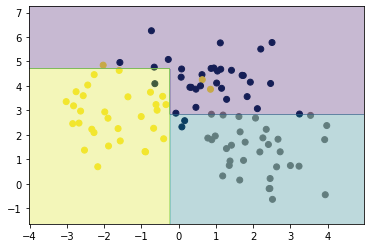

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(0)
# 決定木の深さ設定
max_depth = 2

# テスト用の分類用データセットの作成
data, target = make_blobs(n_samples=100, centers=3, cluster_std=1.0)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap="cividis")
# 訓練データとテストデータの分離
train_data, test_data, train_target, test_target = train_test_split(data, target)
# 決定木の作成
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)

# モデルの学習
model.fit(train_data, train_target)
# 正解率の計算
print(model.score(test_data, test_target))

# モデルの予測結果を表示
# 描画領域を計算(x1:横軸、x2:縦軸)
min_x1, max_x1 = data[:, 0].min() - 1, data[:, 0].max() + 1
min_x2, max_x2 = data[:, 1].min() - 1, data[:, 1].max() + 1
xx1, xx2 = np.meshgrid(
    np.arange(min_x1, max_x1, 0.01), np.arange(min_x2, max_x2, 0.01)
)

input_data = np.array([xx1.ravel(), xx2.ravel()]).T
# 学習したモデルで予測
pred = model.predict(input_data)
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), alpha=0.3)
plt.show()


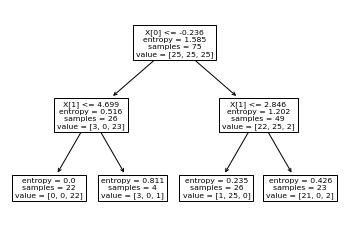

In [10]:
from sklearn import tree

tree.plot_tree(model)
#plt.savefig('images/03_21_1.pdf')
plt.show()